# only 국민연금 가입 data

In [1]:
import pandas as pd
import numpy as np
import csv
import	koreanize_matplotlib
import matplotlib.pyplot as plt

## 국민연금 가입

In [2]:
f1 = "국민연금 가입 사업장 내역_2022.csv"
pensionDF = pd.read_csv(f1, encoding="cp949")

C:\Users\kdp\AppData\Local\Temp\ipykernel_21724\274526030.py:2: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  pensionDF = pd.read_csv(f1, encoding="cp949")


In [3]:
pensionDF.head()

,자료생성년월,사업장명,사업자등록번호,사업장가입상태코드 1 등록 2 탈퇴,우편번호,사업장지번상세주소,사업장도로명상세주소,고객법정동주소코드,고객행정동주소코드,법정동주소광역시도코드,...,사업장형태구분코드 1 법인 2 개인,사업장업종코드,사업장업종코드명,적용일자,재등록일자,탈퇴일자,가입자수,당월고지금액,신규취득자수,상실가입자수
0,2022-10,우성기전(주),126811,1,12816,경기도 광주시 도척면,경기도 광주시 도척면 도척윗로,4161033025,4161033025,41,...,1,292201,동력식 수지 공구 제조업,1988-01-01,NaN,NaN,4,899980,0,0
1,2022-10,서능공원묘지운영회(재),102820,1,11191,경기도 포천시 내촌면,,4165032022,4165032022,41,...,1,701700,화장터 운영 묘지 분양 및 관리업,1988-01-01,NaN,NaN,10,3105220,0,0
2,2022-10,노들새마을금고,108820,1,06923,서울특별시 동작구 노량진동,서울특별시 동작구 만양로,1159010100,1159051000,11,...,1,659202,신용조합,1988-01-01,NaN,NaN,12,4956440,0,0
3,2022-10,유창성업(주),122812,1,22849,인천광역시 서구 오류동,인천광역시 서구 갑문2로,2826011900,2826072000,28,...,1,749604,그 외 기타 분류 안된 사업 지원 서비스업(기타임가공,1988-01-01,NaN,NaN,23,5123500,0,0
4,2022-10,희성전자(주),106810,1,04410,서울특별시 용산구 한남동,서울특별시 용산구 독서당로14길,1117013100,1117067000,11,...,1,701201,비주거용 건물 임대업(점포 자기땅),1988-01-01,NaN,NaN,395,187681460,0,1


In [4]:
pensionDF.columns

Index(['자료생성년월', '사업장명', '사업자등록번호', '사업장가입상태코드 1 등록 2 탈퇴', '우편번호', '사업장지번상세주소',
       '사업장도로명상세주소', '고객법정동주소코드', '고객행정동주소코드', '법정동주소광역시도코드', '법정동주소광역시시군구코드',
       '법정동주소광역시시군구읍면동코드', '사업장형태구분코드 1 법인 2 개인', '사업장업종코드', '사업장업종코드명',
       '적용일자', '재등록일자', '탈퇴일자', '가입자수', '당월고지금액', '신규취득자수', '상실가입자수'],
      dtype='object')

사용할 데이터 col을 뽑아보자

In [5]:
pensionDF['사업장지번상세주소'] = np.where(pensionDF['사업장지번상세주소'].str.strip() != '', pensionDF['사업장지번상세주소'], pensionDF['사업장도로명상세주소'])

In [6]:
pensionDF = pensionDF[["사업장명", "사업장지번상세주소", "가입자수", "당월고지금액"]]

In [7]:
list(pensionDF["사업장지번상세주소"].unique())

['경기도 광주시 도척면',
 '경기도 포천시 내촌면',
 '서울특별시 동작구 노량진동',
 '인천광역시 서구 오류동',
 '서울특별시 용산구 한남동',
 '서울특별시 강남구 삼성동',
 '경기도 파주시 문발동',
 '서울특별시 종로구 수송동',
 '경기도 광명시 일직동',
 '전라북도 남원시 월락동',
 '경기도 화성시 봉담읍',
 '서울특별시 종로구 도렴동',
 '서울특별시 중구 장충동1가',
 '서울특별시 종로구 내자동',
 '서울특별시 강남구 논현동',
 '서울특별시 중구 을지로2가',
 '서울특별시 영등포구 대림동',
 '서울특별시 강남구 역삼동',
 '서울특별시 강남구 청담동',
 '서울특별시 종로구 종로2가',
 '서울특별시 강서구 등촌동',
 '서울특별시 종로구 부암동',
 '서울특별시 송파구 삼전동',
 '서울특별시 중구 오장동',
 '서울특별시 중구 을지로6가',
 '서울특별시 서초구 양재동',
 '서울특별시 종로구 서린동',
 '서울특별시 광진구 구의동',
 '경기도 평택시 유천동',
 '서울특별시 성동구 성수동1가',
 '서울특별시 마포구 상암동',
 '서울특별시 동대문구 용두동',
 '서울특별시 서초구 방배동',
 '서울특별시 동대문구 답십리동',
 '인천광역시 연수구 송도동',
 '충청남도 아산시 신창면',
 '경기도 포천시 가산면',
 '서울특별시 광진구 중곡동',
 '경기도 안양시 동안구 관양동',
 '서울특별시 성동구 성수동2가',
 '경기도 남양주시 진접읍',
 '서울특별시 노원구 월계동',
 '충청북도 충주시 주덕읍',
 '서울특별시 동대문구 청량리동',
 '서울특별시 송파구 신천동',
 '경기도 광명시 철산동',
 '경기도 포천시 창수면',
 '서울특별시 마포구 도화동',
 '서울특별시 동대문구 장안동',
 '경기도 안성시 양성면',
 '서울특별시 송파구 방이동',
 '서울특별시 강남구 개포동',
 '서울특별시 강북구 수유동',
 '서울특별시 중구 남산동2가',
 '서울특별시 성북구 정릉동',
 '서울특별시 중랑구 상봉동',

In [8]:
pensionDF.columns = ["사업장명", "본사주소", "가입자수", "당월고지금액"]
pensionDF.columns

Index(['사업장명', '본사주소', '가입자수', '당월고지금액'], dtype='object')

In [9]:
# pensionDF.drop(pensionDF["본사주소"] == " ")

### 주소분리

In [10]:
pensionDF.sort_values("당월고지금액")

,사업장명,본사주소,가입자수,당월고지금액
447879,(주)포올이앤씨-(일용)한빛본부 사택 3단지(1차) 신축 통신공사,전라남도 영광군 홍농읍,0,0
42492,(주)업투어,서울특별시 중구 무교동,0,0
524266,새한건설주식회사/일용/부림 중권마을 세천 정비공사,경상남도 의령군 가례면,0,0
411032,(주)협성기전/일용/시화MTV단지조성 전기공사,경기도 안산시 단원구 성곡동,0,0
494256,리코플러스주식회사,서울특별시 영등포구 여의도동,0,0
...,...,...,...,...
157889,엘지디스플레이(주),서울특별시 영등포구 여의도동,30113,13448143760
141812,에스케이하이닉스 주식회사,경기도 이천시 부발읍,30660,14946654220
13552,엘지전자(주),서울특별시 영등포구 여의도동,35023,16803546620
3325,현대자동차(주),서울특별시 서초구 양재동,67671,32199115080


In [11]:
addr = pd.DataFrame(pensionDF["본사주소"])
addr = addr["본사주소"].apply(lambda x : x.split()[:2])
addr =	pd.DataFrame(addr.tolist(), columns=('시도', '군구'))
addr.head()

,시도,군구
0,경기도,광주시
1,경기도,포천시
2,서울특별시,동작구
3,인천광역시,서구
4,서울특별시,용산구


In [12]:
pensionDF[["시도", "군구", "나머지 주소"]] = pensionDF["본사주소"].str.split(' ', n=2, expand=True)
pensionDF.head()

,사업장명,본사주소,가입자수,당월고지금액,시도,군구,나머지 주소
0,우성기전(주),경기도 광주시 도척면,4,899980,경기도,광주시,도척면
1,서능공원묘지운영회(재),경기도 포천시 내촌면,10,3105220,경기도,포천시,내촌면
2,노들새마을금고,서울특별시 동작구 노량진동,12,4956440,서울특별시,동작구,노량진동
3,유창성업(주),인천광역시 서구 오류동,23,5123500,인천광역시,서구,오류동
4,희성전자(주),서울특별시 용산구 한남동,395,187681460,서울특별시,용산구,한남동


In [13]:
pensionDF = pensionDF.drop("본사주소", axis = True)

In [14]:
pensionDF["시도"].unique()

array(['경기도', '서울특별시', '인천광역시', '전라북도', '충청남도', '충청북도', '강원도', '부산광역시',
       '전라남도', '울산광역시', '경상북도', '세종특별자치시', '경상남도', '대구광역시', '제주특별자치도', '',
       '대전광역시', '광주광역시', '황해북도'], dtype=object)

In [15]:
# pensionDF[pensionDF["시도"]==""]
pensionDF = pensionDF[pensionDF["시도"] != ""]

In [16]:
addr_aliases =	{'전라북도':'전북특별자치도'}

In [17]:
pensionDF['시도'] = pensionDF['시도'].apply(lambda	v: addr_aliases.get(v, v))

## <hr>Group Area 

In [24]:
group_area = pensionDF.groupby(["시도"]).sum(numeric_only=True)
group_area.head()

,가입자수,당월고지금액
시도,,
강원도,222769,62600483340
경기도,2498093,801688074840
경상남도,514789,156237160980
경상북도,446328,139937057140
광주광역시,199190,55827667380


In [25]:
group_area["div"] = group_area["당월고지금액"] / group_area["가입자수"]

In [26]:
group_area = group_area.sort_values("div", ascending=False)
group_area = group_area.drop("황해북도")
group_area

,가입자수,당월고지금액,div
시도,,,
울산광역시,200480,65499944420,326715.604649
서울특별시,3668892,1191797600480,324838.561746
경기도,2498093,801688074840,320920.027733
경상북도,446328,139937057140,313529.639951
충청남도,413452,129300861580,312734.879938
대전광역시,271961,83605438560,307417.014057
인천광역시,431648,131200773420,303953.159565
경상남도,514789,156237160980,303497.473683
전라남도,314246,95297561180,303257.833608


In [32]:
col_list = group_area.index.to_list()
company = []
color = []
for col in col_list:
    print(f"================{col}================")
    print(pensionDF[pensionDF["시도"]==col].sort_values("당월고지금액", ascending=False).head(3)["사업장명"])
    sr = pensionDF[pensionDF["시도"]==col].sort_values("당월고지금액", ascending=False).head(1)["사업장명"]
    if "광역시" in col:
        color.append("red")
    else:
        color.append("gray")
    company += sr.to_list()
    print(f"company = {company}")

================울산광역시================
380969    현대중공업주식회사
27362        근로복지공단
151920    (주)현대미포조선
Name: 사업장명, dtype: object
company = ['현대중공업주식회사']
================서울특별시================
3325        현대자동차(주)
13552        엘지전자(주)
157889    엘지디스플레이(주)
Name: 사업장명, dtype: object
company = ['현대중공업주식회사', '현대자동차(주)']
================경기도================
4324            삼성전자(주)
141812    에스케이하이닉스 주식회사
201935       삼성디스플레이(주)
Name: 사업장명, dtype: object
company = ['현대중공업주식회사', '현대자동차(주)', '삼성전자(주)']
================경상북도================
507183       주식회사포스코
11266     한국수력원자력(주)
142434        한국도로공사
Name: 사업장명, dtype: object
company = ['현대중공업주식회사', '현대자동차(주)', '삼성전자(주)', '주식회사포스코']
================충청남도================
46151     현대제철주식회사당진공장
46459           코웨이(주)
101087      현대트랜시스주식회사
Name: 사업장명, dtype: object
company = ['현대중공업주식회사', '현대자동차(주)', '삼성전자(주)', '주식회사포스코', '현대제철주식회사당진공장']
================대전광역시================
4819         한국철도공사
147154      한국수자원공사
110582    (주)케이티씨에스
Name: 사업장명, dtype: o

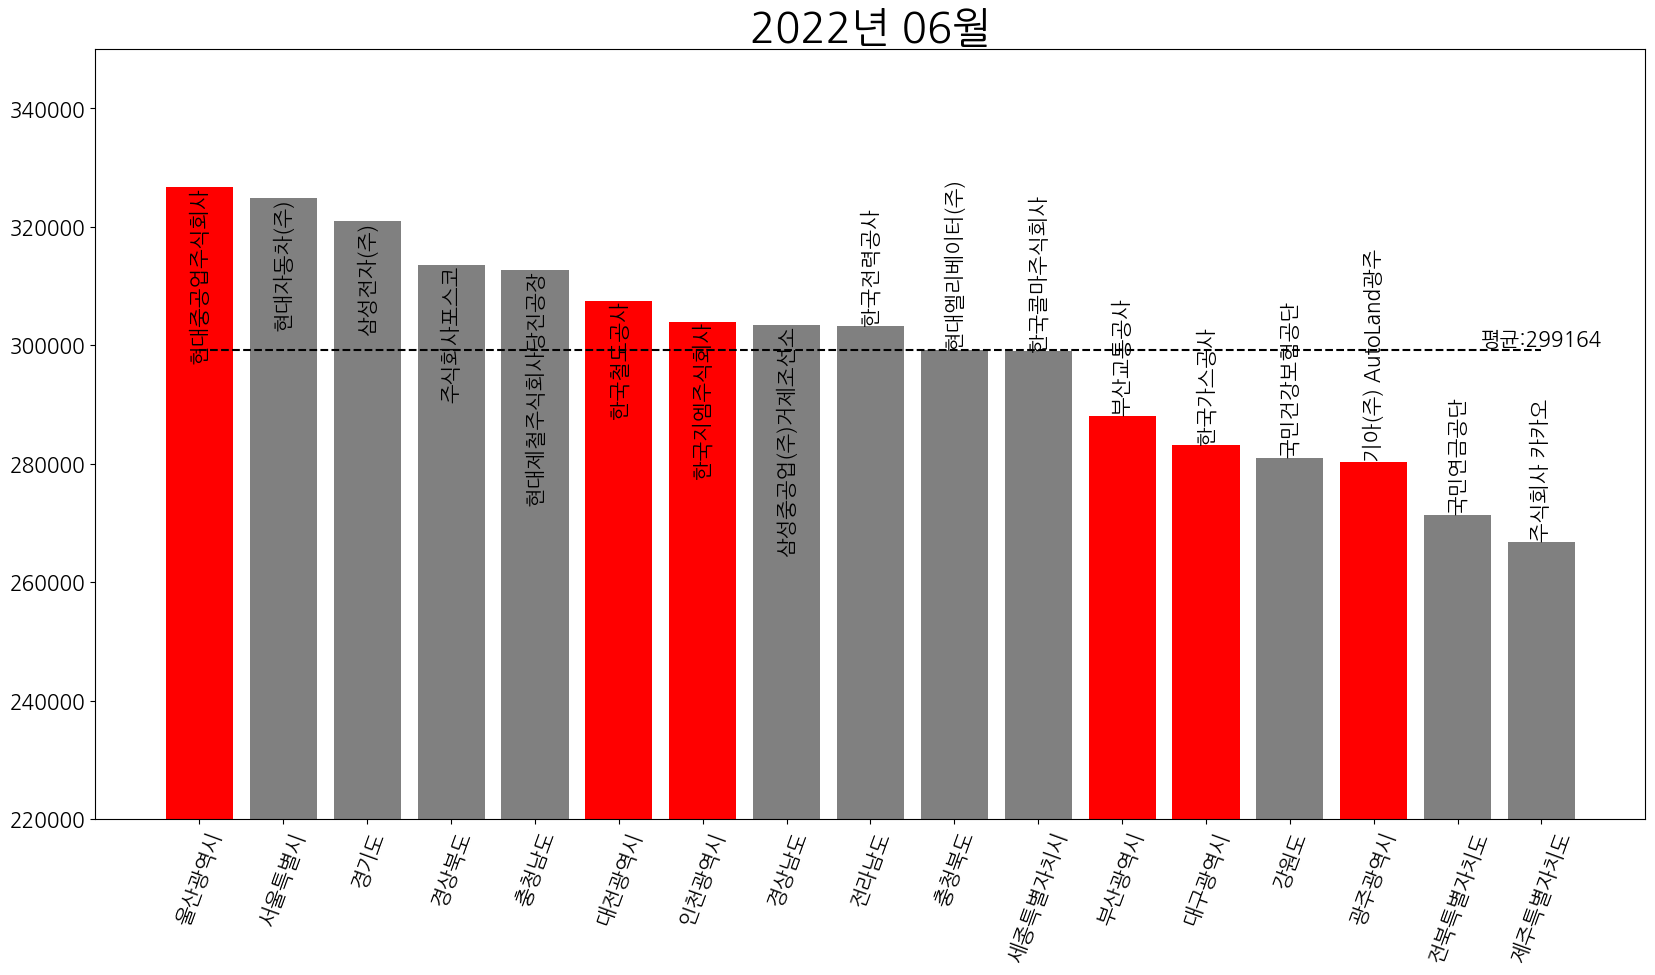

In [42]:
avg = group_area["div"].mean()
plt.figure(figsize=(20, 10))
x = group_area.index.to_list()
y = group_area["div"].to_list()

plt.plot(x, [avg]*len(x), "k--")
bar = plt.bar(x, y, color = color)


plt.xticks(rotation=70)
plt.ylim(220000, 350000)
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)

idx = 0

plt.title("2022년 06월", fontsize = "30")
# 숫자 넣는 부분
for rect in bar:
    height = rect.get_height()
    if idx < 8:
        plt.text(rect.get_x() + rect.get_width()/2.0, height, company[idx], ha='center', va='top', size = 15, rotation=90)
    else:    
        plt.text(rect.get_x() + rect.get_width()/2.0, height, company[idx], ha='center', va='bottom', size = 15, rotation=90)
    idx += 1

plt.text(rect.get_x() + rect.get_width()/2.0, avg, f"평균:{round(avg)}", ha='center', va='bottom', size = 15)

plt.show()

In [ ]:
company